In [1]:
File_name = input()

C:\Users\박주홍\Desktop\Final_Big_Data\부산 카페.csv


In [2]:
with open(File_name, 'rt', encoding = 'UTF8') as file:
    csv_data = []
    for line in file.readlines():
        csv_data.append(line.split(','))
csv_data

[['\ufeffColumn1', 'Column2\n'],
 ['스타벅스 더해운대R점', '부산광역시 해운대구 해운대해변로 197\n'],
 ['스타벅스 부산송정비치점', '부산광역시 해운대구 송정해변로 36\n'],
 ['스타벅스 서면중앙대로R점', '부산광역시 부산진구 중앙대로 672\n'],
 ['스타벅스 광안리점', '부산광역시 수영구 광안해변로 247\n'],
 ['스타벅스 하버타운점', '부산광역시 해운대구 해운대해변로 257 하버타운\n'],
 ['스타벅스 부산덕천역점', '부산광역시 북구 만덕대로 30\n'],
 ['스타벅스 사상역점', '부산광역시 사상구 사상로 211\n'],
 ['스타벅스 경성대점', '부산광역시 남구 수영로 312\n'],
 ['스타벅스 BIFF광장점', '부산광역시 중구 비프광장로 25\n'],
 ['스타벅스 을숙도강변DT점', '부산광역시 사하구 하신번영로 381-6\n'],
 ['스타벅스 서면로R점', '부산광역시 부산진구 서면로 49-1\n'],
 ['스타벅스 부산화명역점', '부산광역시 북구 금곡대로285번길 5\n'],
 ['스타벅스 광안비치점', '부산광역시 수영구 광안로62번길 39\n'],
 ['스타벅스 부산대점', '부산광역시 금정구 금정로68번길 2\n'],
 ['스타벅스 광안수변공원점', '부산광역시 수영구 민락수변로 29\n'],
 ['스타벅스 남천점', '부산광역시 수영구 남천바다로 38\n'],
 ['스타벅스 부산서면점', '부산광역시 부산진구 중앙대로692번길 46-10\n'],
 ['스타벅스 해운대달맞이점', '부산광역시 해운대구 달맞이길 189\n'],
 ['스타벅스 동부산DT점', '부산광역시 기장군 기장읍 기장해안로 56\n'],
 ['스타벅스 동래역점', '부산광역시 동래구 충렬대로181번길 42\n'],
 ['스타벅스 범일교차로점', '부산광역시 동구 조방로 4\n'],
 ['스타벅스 센텀드림월드점', '부산광역시 해운대구 센텀2로 25\n'],
 ['스타벅스 부산개금역점', '부산광

In [3]:
# 카카오 API 중 ADDRESS.JSON 을 활용한 좌표 출력
import requests
import json
output = [[ 0 for x in range(2) ] for y in range(len(csv_data))]

for i in range(1, len(csv_data)):
    location = csv_data[i][1]
    headers = {'Authorization' : 'KakaoAK cece2f201ea21342bd507cea8923f5bd'}
    body = {'query' : location}
    response = requests.request("GET",
                                'https://dapi.kakao.com/v2/local/search/address.json',
                                data=body,
                                headers=headers)
    res = json.loads(response.text)
    if(res['meta']['total_count'] != 0):
        x = res['documents'][0]['x']
        y = res['documents'][0]['y']
        output[i][0] = x
        output[i][1] = y
        print(i)
        print("location= " + location)
        print("x = " + output[i][0])
        print("y = " + output[i][1])
        print("")
    else:
        #네이버 지도와 카카오 API 간의 정보가 차이가 있을 때 한 글자씩 줄여서 최대한 비슷한 위치
        while True:
            new_location = location[0:-1]
            location = new_location
            body = {'query' : location}
            response = requests.request("GET",
                                'https://dapi.kakao.com/v2/local/search/address.json',
                                data=body,
                                headers=headers)
            res = json.loads(response.text)
            if(res['meta']['total_count'] != 0):
                x = res['documents'][0]['x']
                y = res['documents'][0]['y']
                output[i][0] = x
                output[i][1] = y
                print(i)
                print("location= " + location)
                print("x = " + output[i][0])
                print("y = " + output[i][1])
                print("")
                break

1
location= 부산광역시 해운대구 해운대해변로 197

x = 129.1528350087543
y = 35.15880320917911

2
location= 부산광역시 해운대구 송정해변로 36

x = 129.20225566213577
y = 35.180727612208294

3
location= 부산광역시 부산진구 중앙대로 672

x = 129.05960665175053
y = 35.153006306182135

4
location= 부산광역시 수영구 광안해변로 247

x = 129.12084558370984
y = 35.15504575720844

5
location= 부산광역시 해운대구 해운대해변로 257 하버타운

x = 129.15951673291792
y = 35.15968631068711

6
location= 부산광역시 북구 만덕대로 30

x = 129.0084802439886
y = 35.210660208967845

7
location= 부산광역시 사상구 사상로 211

x = 128.98339925552486
y = 35.163974941936566

8
location= 부산광역시 남구 수영로 312

x = 129.10062174337517
y = 35.13697860996388

9
location= 부산광역시 중구 비프광장로 25

x = 129.02801690209395
y = 35.09894997678464

10
location= 부산광역시 사하구 하신번영로 381-6

x = 128.9595348158848
y = 35.115364308266564

11
location= 부산광역시 부산진구 서면로 49-1

x = 129.05753445874223
y = 35.15524757485071

12
location= 부산광역시 북구 금곡대로285번길 5

x = 129.0131773013198
y = 35.23367356039309

13
location= 부산광역시 수영구 광안로62번길 39

x = 129.117

105
location= "부산광역시 기장군 정관읍 정관로 563 
x = 129.17563653093862
y = 35.321914539033415

106
location= 부산광역시 해운대구 센텀3로 20 해운대센텀호텔 1F 101호

x = 129.13281858796313
y = 35.16781201369681

107
location= 부산광역시 중구 중앙대로 2

x = 129.03670287202908
y = 35.0983068708713

108
location= 부산광역시 사하구 장림번영로 71

x = 128.97306646415237
y = 35.08087441550044

109
location= 부산광역시 기장군 철마면 여락송정로 326 카페빈

x = 129.11195077030328
y = 35.305068440386115

110
location= 부산광역시 수영구 수영로384번길 19 남천파크

x = 129.10749303915816
y = 35.14019713762764

111
location= 부산광역시 수영구 망미로22번길 52-2

x = 129.10192627577885
y = 35.170972760530404

112
location= 부산광역시 금정구 식물원로75번길 29

x = 129.080698446119
y = 35.224914743224204

113
location= 부산광역시 동래구 충렬대로202번가길 1

x = 129.08194624053817
y = 35.2018814963568

114
location= 부산광역시 동래구 명안로 72 1층

x = 129.10423279794887
y = 35.20288026128752

115
location= 부산광역시 연제구 법원로32번길 18 나래타운빌딩

x = 129.07490824897246
y = 35.19107315175515

116
location= 부산광역시 중구 중앙대로 17 광복지하도상가

x = 129.0363258925359
y =

206
location= 부산광역시 기장군 장안읍 정관로 1133 부산프리미엄아울렛 2F 232

x = 129.23496420003775
y = 35.32381281550266

207
location= 부산광역시 강서구 거가대로 2571

x = 128.8095884258029
y = 35.02301425160227

208
location= 부산광역시 사하구 낙동남로 1414

x = 128.96626907778636
y = 35.10587928129445

209
location= 부산광역시 동래구 충렬대로181번길 36

x = 129.08012891376885
y = 35.20535514391433

210
location= 부산광역시 동래구 온천장로119번길 7

x = 129.08432187788134
y = 35.22128383297069

211
location= 부산광역시 사하구 낙동남로 1418

x = 128.96677402205395
y = 35.105899925508616

212
location= 부산광역시 남구 수영로358번길 12 세봉한의원

x = 129.10480316840483
y = 35.13883810505465

213
location= 부산광역시 북구 금곡대로285번길 22 월드타워

x = 129.01231979424918
y = 35.23417445213629

214
location= 부산광역시 금정구 금정로68번길 10

x = 129.0870766767013
y = 35.23056864116427

215
location= 부산광역시 수영구 수영로588번길 7

x = 129.11365412987934
y = 35.15835074606085

216
location= 부산광역시 금정구 남산로 3

x = 129.09191886918532
y = 35.26668578555193

217
location= 부산광역시 북구 구포만세길 115 효산벨루스

x = 128.99808751672933
y = 35.206

307
location= 부산광역시 수영구 광남로 152

x = 129.11812543994586
y = 35.15474732053344

308
location= 부산광역시 금정구 금강로403번길 1

x = 129.08725964577636
y = 35.243707806945444

309
location= 부산광역시 연제구 법원로32번길 9 고려빌딩

x = 129.07480668741053
y = 35.19156872540777

310
location= 부산광역시 금정구 부곡로 3

x = 129.08643813531734
y = 35.217642766790284

311
location= 부산광역시 동래구 아시아드대로 223

x = 129.06668175386454
y = 35.20398505471562

312
location= 부산광역시 수영구 황령대로489번길 11

x = 129.10774451028814
y = 35.13888788934171

313
location= 부산광역시 남구 수영로358번길 12

x = 129.10480316840483
y = 35.13883810505465

314
location= 부산광역시 수영구 광안해변로 446 
x = 129.12989475577334
y = 35.161068825712114

315
location= 부산광역시 사상구 가야대로 278-1

x = 129.002975669549
y = 35.15014234581836

316
location= 부산광역시 해운대구 아랫반송로 25 샬롬안경

x = 129.14883311840748
y = 35.22501798730463

317
location= 부산광역시 동래구 명장로 56

x = 129.10695104468232
y = 35.20457398952725

318
location= 부산광역시 기장군 정관읍 용수리 1291-1 1층

x = 129.1807254305729
y = 35.3281522671321

319
location=

408
location= 부산광역시 강서구 범방3로46번길 5

x = 128.8806926116123
y = 35.147499500492714

409
location= 부산광역시 남구 수영로 46

x = 129.07230595812334
y = 35.13630202850701

410
location= 부산광역시 남구 문현금융로 40 상가동 127호

x = 129.06585415976454
y = 35.14649083689357

411
location= 부산광역시 사하구 다대로 544

x = 128.97098114785453
y = 35.057805419491544

412
location= 부산광역시 부산진구 동천로 73 디에스타워

x = 129.06209877275373
y = 35.155234828902

413
location= 부산광역시 북구 덕천1길 21

x = 129.00675449541973
y = 35.20996069396518

414
location= 부산광역시 부산진구 신천대로62번길 74

x = 129.05850952711234
y = 35.15405588907136

415
location= 부산광역시 수영구 광안해변로 217 (광안동) 호메르스호텔 1층

x = 129.11798148121684
y = 35.15342694811021

416
location= 부산광역시 수영구 광안해변로 251

x = 129.12136895836525
y = 35.15525647131475

417
location= 부산광역시 남구 용소로 7 청라빌딩

x = 129.10063151008669
y = 35.1366756518584

418
location= 부산광역시 사상구 광장로 90

x = 128.9865215495763
y = 35.16168163982415

419
location= 부산광역시 기장군 일광면 일광로 352

x = 129.2546903310808
y = 35.27410547651689

420
locatio

509
location= 부산광역시 강서구 대저2동 2551-86

x = 128.94715066889867
y = 35.17193126477616

510
location= 부산광역시 중구 중앙대로 2 13층

x = 129.03670287202908
y = 35.0983068708713

511
location= 부산광역시 해운대구 마린시티3로 51 
x = 129.14583135809485
y = 35.154014468847826

512
location= 부산광역시 사상구 광장로 60

x = 128.98299406754612
y = 35.16175026582276

513
location= 부산광역시 북구 만덕대로 37

x = 129.00909016313335
y = 35.211349389685616

514
location= 부산광역시 해운대구 해운대해변로 140 해운대홈플러스

x = 129.1464951298022
y = 35.15839669083537

515
location= 부산광역시 강서구 대저2동 2350-1

x = 128.94683217632664
y = 35.17293489470244

516
location= 부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 1F

x = 129.212779020393
y = 35.192214344940204

517
location= 부산광역시 해운대구 선수촌로21번길 37

x = 129.11570288879759
y = 35.19658856078821

518
location= 부산광역시 부산진구 신천대로 241

x = 129.0493140083127
y = 35.16330638275681

519
location= 부산광역시 사상구 광장로 7

x = 128.97771463631275
y = 35.16433466076401

520
location= 부산광역시 강서구 거가대로 2571

x = 128.8095884258029
y = 35.02301425160227

521
loc

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

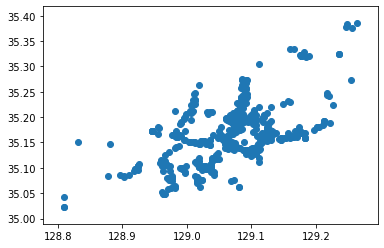

In [5]:
X, y = make_blobs(n_samples=len(output), centers=1, cluster_std=0.60, random_state=0)

for i in range(0, len(output)-1): 
    for j in range(2): 
        X[i, j] = output[i+1][j]

X[len(output)-1, 0] = output[i][0]
X[len(output)-1, 1] = output[i][1]
plt.scatter(X[:,0], X[:,1])

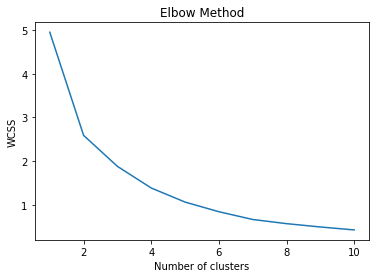

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
num_clusters = input("가장 많이 꺾이는 지점을 적으세요 : ")
num_clusters = int(num_clusters)

가장 많이 꺾이는 지점을 적으세요 : 15


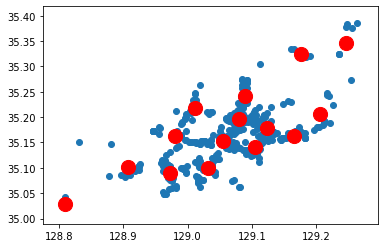

In [24]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [25]:
matrix = [[0]*num_clusters for i in range(num_clusters)]
data = [0] * num_clusters
import math

def distance():
    for i in range(num_clusters):
        data[i] = i + 1
        x_start = kmeans.cluster_centers_[i, 0]
        y_start = kmeans.cluster_centers_[i, 1]
        for j in range(num_clusters):
            x_end = kmeans.cluster_centers_[j, 0]
            y_end = kmeans.cluster_centers_[j, 1]
            matrix[i][j] = math.sqrt( (x_start - x_end) **2 + (y_start - y_end) **2 )

distance()

In [26]:
import sys
import copy

n = len(data)
all_sets = []
g = {}
p = []
shortest_path = []

def main():
    for x in range(1, n):
        g[x + 1, ()] = matrix[x][0]

    get_minimum(data[0], tuple(data[1:]) )

    print('최단 거리 분석 결과: {1, ', end='')
    shortest_path.append(0)
    solution = p.pop()
    print(solution[1][0], end=', ')
    shortest_path.append(solution[1][0]-1)
    
    for x in range(n - 2):
        for new_solution in p:
            if tuple(solution[1]) == new_solution[0]:
                solution = new_solution
                print(solution[1][0], end=', ')
                shortest_path.append(solution[1][0]-1)
                break
    print('1}')
    shortest_path.append(0)
    return


def get_minimum(k, a):
    if (k, a) in g:
        # Already calculated Set g[%d, (%s)]=%d' % (k, str(a), g[k, a]))
        return g[k, a]

    values = []
    all_min = []
    for j in a:
        set_a = copy.deepcopy(list(a))
        set_a.remove(j)
        all_min.append([j, tuple(set_a)])
        result = get_minimum(j, tuple(set_a))
        values.append(matrix[k-1][j-1] + result)

    # get minimun value from set as optimal solution for
    g[k, a] = min(values)
    p.append(((k, a), all_min[values.index(g[k, a])]))

    return g[k, a]

main();

최단 거리 분석 결과: {1, 4, 12, 13, 2, 5, 9, 3, 15, 6, 14, 10, 11, 8, 7, 1}


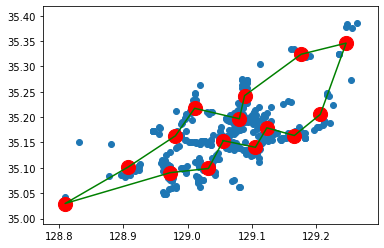

In [27]:
shortest_draw_x = []
shortest_draw_y = []

for i in range(len(shortest_path)):
    shortest_draw_x.append(kmeans.cluster_centers_[shortest_path[i], 0])
    shortest_draw_y.append(kmeans.cluster_centers_[shortest_path[i], 1])
    
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.plot(shortest_draw_x, shortest_draw_y, c='green')

plt.show()